# Sentiment Analysis and Zero-Shot Classification

## Garden Tech

In [11]:
from google.colab import files
src = list(files.upload().values())[0]

Saving helper_functions.py to helper_functions.py


In [12]:
open('helper_functions.py','wb').write(src)
import helper_functions 

In [13]:
from helper_functions import *

In [15]:
import pandas as pd
!pip install numpy==1.22.0
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', None) 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement numpy==1.22.0 (from versions: 1.3.0, 1.4.1, 1.5.0, 1.5.1, 1.6.0, 1.6.1, 1.6.2, 1.7.0, 1.7.1, 1.7.2, 1.8.0, 1.8.1, 1.8.2, 1.9.0, 1.9.1, 1.9.2, 1.9.3, 1.10.0.post2, 1.10.1, 1.10.2, 1.10.4, 1.11.0, 1.11.1, 1.11.2, 1.11.3, 1.12.0, 1.12.1, 1.13.0rc1, 1.13.0rc2, 1.13.0, 1.13.1, 1.13.3, 1.14.0rc1, 1.14.0, 1.14.1, 1.14.2, 1.14.3, 1.14.4, 1.14.5, 1.14.6, 1.15.0rc1, 1.15.0rc2, 1.15.0, 1.15.1, 1.15.2, 1.15.3, 1.15.4, 1.16.0rc1, 1.16.0rc2, 1.16.0, 1.16.1, 1.16.2, 1.16.3, 1.16.4, 1.16.5, 1.16.6, 1.17.0rc1, 1.17.0rc2, 1.17.0, 1.17.1, 1.17.2, 1.17.3, 1.17.4, 1.17.5, 1.18.0rc1, 1.18.0, 1.18.1, 1.18.2, 1.18.3, 1.18.4, 1.18.5, 1.19.0rc1, 1.19.0rc2, 1.19.0, 1.19.1, 1.19.2, 1.19.3, 1.19.4, 1.19.5, 1.20.0rc1, 1.20.0rc2, 1.20.0, 1.20.1, 1.20.2, 1.20.3, 1.21.0rc1, 1.21.0rc2, 1.21.0, 1.21.1, 1.21.2, 1.21.3, 1.21.4, 1.21.5, 1.21.6)
ERROR: No matching 

In [16]:
!pip install torch torchvision torchaudio
import torch

!pip install tensorflow
import tensorflow as tf
print(tf.reduce_sum(tf.random.normal([1000, 1000])))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
tf.Tensor(-359.07422, shape=(), dtype=float32)


In [17]:
!pip install transformers
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 19.1 MB/s 
     |████████████████████████████████| 163 kB 39.2 MB/s 


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [20]:
from google.colab import files
uploaded = files.upload()

Saving GardenTech.csv to GardenTech.csv


In [21]:
df = pd.read_csv('GardenTech.csv', index_col = [0])
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count
22240,Garden,134189,Sevin Ready to Use 5% Dust 3 lb.,https://www.homedepot.com/p/Sevin-3-lbs-Ready-...,Homedepot,GardenTech,316708109,100539964,Yes,2022-05-16T00:00:00,2022,5,20,Excellent insect killer,[This review was collected as part of a promot...,syndicated reviews,15.47,5,1,0,0,Yes,[this review was collected as part of a promot...,2022-05-16,26
27585,Garden,143517,Sevin Ready-to-Spray Bug Killer 32 oz.,https://www.lowes.com/pd/Sevin-1-Quart-Garden-...,Lowes,GardenTech,1000477903,1000477903,No,2022-06-27T00:00:00,2022,6,26,Rip off!,See the pictures. When I took the lid off the ...,syndicated reviews,15.48,1,0,0,0,No,see the pictures. when i took the lid off the ...,2022-06-27,44
25693,Garden,141625,Sevin Ready-to-Use 1.33 gal.,http://www.homedepot.com/p/303593722,Homedepot,GardenTech,311707480,303593722,Yes,2022-06-07T00:00:00,2022,6,23,Amazing results,[This review was collected as part of a promot...,syndicated reviews,25.32,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-07,50
19048,Garden,130514,Sevin Ready to Use 5% Dust 1 lb.,http://www.homedepot.com/p/203027209,Homedepot,GardenTech,203027209,203027209,No,2022-05-28T00:00:00,2022,5,21,Works great!,[This review was collected as part of a promot...,syndicated reviews,6.27,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-28,27
22861,Garden,134862,Sevin Ready to Use 5% Dust 1 lb. 3-Pack,https://www.lowes.com/pd/Sevin-5-Dust-1-lb-Gar...,Lowes,GardenTech,1000481173,1000481173,No,2022-05-22T00:00:00,2022,5,20,Worked great,[This review was collected as part of a promot...,syndicated reviews,14.98,5,1,0,0,Yes,[this review was collected as part of a promot...,2022-05-22,119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22425,Garden,134388,Sevin Ready-to-Use 1 gal.,https://www.lowes.com/pd/Sevin-1-Gallon-Garden...,Lowes,GardenTech,50261725,50261725,No,2022-05-16T00:00:00,2022,5,20,Very easy to use!,[This review was collected as part of a promot...,syndicated reviews,16.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-16,34
22198,Garden,134146,Sevin Ready to Use 5% Dust 3 lb.,https://www.homedepot.com/p/Sevin-3-lbs-Ready-...,Homedepot,GardenTech,316708109,100539964,Yes,2022-05-22T00:00:00,2022,5,20,Insect Killer Dust,[This review was collected as part of a promot...,syndicated reviews,15.47,4,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-22,45
20489,Garden,132140,Sevin Insect Killer,http://www.homedepot.com/p/303593722,Homedepot,GardenTech,100598614,303593722,Yes,2022-05-24T00:00:00,2022,5,21,Awesome product!,[This review was collected as part of a promot...,syndicated reviews,7.49,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-24,178
28035,Garden,143973,Sevin Insect Killer Ready to Use2 1.33 Gal,https://www.lowes.com/pd/Sevin-Ready-to-Use-1-...,Lowes,GardenTech,1001413712,1001413712,No,2022-06-07T00:00:00,2022,6,23,Efficient and Easy to Use,[This review was collected as part of a promot...,syndicated reviews,22.98,4,3,0,0,Yes,[this review was collected as part of a promot...,2022-06-07,155


# Sentiment Analysis

In [22]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [23]:
#sample sentiment analysis
sample_review = list(df['review_text'])[1]
result = sentiment_pipeline(sample_review)
result

##negative with score of 0.797

[{'label': 'Negative', 'score': 0.7970485091209412}]

In [24]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

sentiment = []
index = -1
for sentence in df['review_lower']:
    index+=1
    if(index%20 == 0):
        print(index)

    result = sentiment_pipeline(sentence[:512])[0]
    sentiment.append(result['label'])
df['sentiment'] = sentiment

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [25]:
df

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment
22240,Garden,134189,Sevin Ready to Use 5% Dust 3 lb.,https://www.homedepot.com/p/Sevin-3-lbs-Ready-...,Homedepot,GardenTech,316708109,100539964,Yes,2022-05-16T00:00:00,2022,5,20,Excellent insect killer,[This review was collected as part of a promot...,syndicated reviews,15.47,5,1,0,0,Yes,[this review was collected as part of a promot...,2022-05-16,26,Positive
27585,Garden,143517,Sevin Ready-to-Spray Bug Killer 32 oz.,https://www.lowes.com/pd/Sevin-1-Quart-Garden-...,Lowes,GardenTech,1000477903,1000477903,No,2022-06-27T00:00:00,2022,6,26,Rip off!,See the pictures. When I took the lid off the ...,syndicated reviews,15.48,1,0,0,0,No,see the pictures. when i took the lid off the ...,2022-06-27,44,Negative
25693,Garden,141625,Sevin Ready-to-Use 1.33 gal.,http://www.homedepot.com/p/303593722,Homedepot,GardenTech,311707480,303593722,Yes,2022-06-07T00:00:00,2022,6,23,Amazing results,[This review was collected as part of a promot...,syndicated reviews,25.32,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-07,50,Positive
19048,Garden,130514,Sevin Ready to Use 5% Dust 1 lb.,http://www.homedepot.com/p/203027209,Homedepot,GardenTech,203027209,203027209,No,2022-05-28T00:00:00,2022,5,21,Works great!,[This review was collected as part of a promot...,syndicated reviews,6.27,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-28,27,Positive
22861,Garden,134862,Sevin Ready to Use 5% Dust 1 lb. 3-Pack,https://www.lowes.com/pd/Sevin-5-Dust-1-lb-Gar...,Lowes,GardenTech,1000481173,1000481173,No,2022-05-22T00:00:00,2022,5,20,Worked great,[This review was collected as part of a promot...,syndicated reviews,14.98,5,1,0,0,Yes,[this review was collected as part of a promot...,2022-05-22,119,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22425,Garden,134388,Sevin Ready-to-Use 1 gal.,https://www.lowes.com/pd/Sevin-1-Gallon-Garden...,Lowes,GardenTech,50261725,50261725,No,2022-05-16T00:00:00,2022,5,20,Very easy to use!,[This review was collected as part of a promot...,syndicated reviews,16.98,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-16,34,Positive
22198,Garden,134146,Sevin Ready to Use 5% Dust 3 lb.,https://www.homedepot.com/p/Sevin-3-lbs-Ready-...,Homedepot,GardenTech,316708109,100539964,Yes,2022-05-22T00:00:00,2022,5,20,Insect Killer Dust,[This review was collected as part of a promot...,syndicated reviews,15.47,4,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-22,45,Positive
20489,Garden,132140,Sevin Insect Killer,http://www.homedepot.com/p/303593722,Homedepot,GardenTech,100598614,303593722,Yes,2022-05-24T00:00:00,2022,5,21,Awesome product!,[This review was collected as part of a promot...,syndicated reviews,7.49,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-05-24,178,Neutral
28035,Garden,143973,Sevin Insect Killer Ready to Use2 1.33 Gal,https://www.lowes.com/pd/Sevin-Ready-to-Use-1-...,Lowes,GardenTech,1001413712,1001413712,No,2022-06-07T00:00:00,2022,6,23,Efficient and Easy to Use,[This review was collected as part of a promot...,syndicated reviews,22.98,4,3,0,0,Yes,[this review was collected as part of a promot...,2022-06-07,155,Positive


## Zero Shot Classificaiton

In [26]:
import transformers
from transformers import pipeline

In [27]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

Downloading:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

## Sample Classification

this is where you can play around with the labels to see which ones would make sense

In [28]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[1]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## Satisfaction and complaints are not related to the degree of satisfaction. These are the categories of the review.

## Complaints with score of 0.889 and the rest three factors have significantly low scores
## It makes sense because the review is about Complaints

{'sequence': 'See the pictures. When I took the lid off the bottle was sealed shut. I removed the seal and as you can see in the picture there was less than half in the bottle. Will never buy this product again, such a rip off.',
 'labels': ['complaints', 'satisfaction', 'affordability', 'quality'],
 'scores': [0.8885708451271057,
  0.02440989948809147,
  0.0028856892604380846,
  0.001740459119901061]}

In [29]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[2]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## Quality and Satisfaction, which are the factors with the two highest scores, make sense but the review does not seem to highly related to Affordability (0.613 => need to consider putting a threshold)

{'sequence': '[This review was collected as part of a promotion.] Due to our neighbor digging up their backyard our plants were infested with bugs. This product quickly got rid of the bugs and our plants are showing minimal damage from the bugs. I will keep this product in our house always!',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9957756400108337,
  0.7649235129356384,
  0.6133816838264465,
  0.06947679072618484]}

In [30]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[3]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## Quality and Satisfaction, which are the factors with the two highest scores, make sense

{'sequence': '[This review was collected as part of a promotion.] This has worked well in our garden, I havent seen any ants and last year they were everywhere.',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9860182404518127,
  0.7627555727958679,
  0.16309258341789246,
  0.0014483591075986624]}

In [31]:
# play around with the "candidate_labels"
sample_review = list(df['review_text'])[4]

res = classifier(
    sample_review,
    candidate_labels = ['affordability', 'quality', 'satisfaction', 'complaints'], 
    multi_label = True
)
res

## Quality and Satisfaction, which are the factors with the two highest scores, make sense

{'sequence': '[This review was collected as part of a promotion.] Used this to clear out a earth worm infestation that was attracting moles which were destroying my lawn. This stuff really did the trick. I laid down the product and lucky had a good rain storm that came in at night and wiped out a couple hundred of earth worms. Now I dont see any moles since their food supply has been destroyed. Gross to pick up that many works though...I would suggest investing in a 15 inch tweezers set because youll be picking dead worms off your lawn for about a week after applying Sevin. It has also been killing off those peaty Japanese bettles. This stuff works great!!',
 'labels': ['quality', 'satisfaction', 'affordability', 'complaints'],
 'scores': [0.9936370253562927,
  0.8278460502624512,
  0.17649924755096436,
  0.027934564277529716]}

# Zero Shot Classification (Entire data)

Using the labels you identified above, you want to now run it through the entire data

In [32]:
classifier  = pipeline("zero-shot-classification",  model = "facebook/bart-large-mnli")

In [33]:
#insert the labels you identified from above section
type = ['cost', 'efficient', 'effective', 'ease of use']

In [34]:
#setting empty values for the columns
index = -1
for label in type:
    df[label + '_m'] = -1

for j in range(len(df)):
    #counter for progress/debugging
    index+=1
    if(index%20 == 0): 
        print(index)
        
    #running the classifier on the column    
    res = classifier(
        df.iloc[j]['review_lower'],
        candidate_labels = type,
        multi_label = True
    )
    #setting the column values according to the output from the classifier ("_m" = multiclass)
    for i in range(len(res['labels'])):
        df[res['labels'][i]+ '_m'].iloc[j] = res['scores'][i]

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380


In [35]:
#create a "max" column for metric purposes
df['max'] = df[['cost_m', 'efficient_m', 'effective_m', 'ease of use_m']].max(axis=1)
df.head(3)

,segment,review_id,product_name,producturl,retailer,brand,retailer_product_id,base_id,variants_flag,review_creation_date,year,month,week,review_title,review_text,review_type,price,rating,images,videos,helpful_votes,promotion_flag,review_lower,date,word_count,sentiment,cost_m,efficient_m,effective_m,ease of use_m,max
22240,Garden,134189,Sevin Ready to Use 5% Dust 3 lb.,https://www.homedepot.com/p/Sevin-3-lbs-Ready-...,Homedepot,GardenTech,316708109,100539964,Yes,2022-05-16T00:00:00,2022,5,20,Excellent insect killer,[This review was collected as part of a promot...,syndicated reviews,15.47,5,1,0,0,Yes,[this review was collected as part of a promot...,2022-05-16,26,Positive,0.051017,0.982660,0.998803,0.084460,0.998803
27585,Garden,143517,Sevin Ready-to-Spray Bug Killer 32 oz.,https://www.lowes.com/pd/Sevin-1-Quart-Garden-...,Lowes,GardenTech,1000477903,1000477903,No,2022-06-27T00:00:00,2022,6,26,Rip off!,See the pictures. When I took the lid off the ...,syndicated reviews,15.48,1,0,0,0,No,see the pictures. when i took the lid off the ...,2022-06-27,44,Negative,0.932308,0.001182,0.005287,0.001052,0.932308
25693,Garden,141625,Sevin Ready-to-Use 1.33 gal.,http://www.homedepot.com/p/303593722,Homedepot,GardenTech,311707480,303593722,Yes,2022-06-07T00:00:00,2022,6,23,Amazing results,[This review was collected as part of a promot...,syndicated reviews,25.32,5,0,0,0,Yes,[this review was collected as part of a promot...,2022-06-07,50,Positive,0.694234,0.997235,0.999320,0.939854,0.999320


In [36]:
#assign the max to its aligned type
align_list=[]
j = 0
for i in range(len(df)):
  for t in type:
    if df[t+'_m'].iloc[i] == df['max'].iloc[i]:
      # print(i)
      # print(df[t+'_m'].iloc[i])
      align_list.append(t)

df['align_type']=align_list

In [37]:
#Create Pivot table for the Heatmap
table_count = pd.pivot_table(df, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)
table_count

align_type,cost,ease of use,effective,efficient,All
sentiment,,,,,
Negative,40,1,25,0,66
Neutral,5,3,62,0,70
Positive,1,37,223,3,264
All,46,41,310,3,400


In [38]:
#Count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)
table2

align_type,cost,ease of use,effective,efficient
sentiment,,,,
Negative,87%,2%,8%,0%
Neutral,11%,7%,20%,0%
Positive,2%,90%,72%,100%


In [39]:
#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

#check results
results

array([['87%', '2%', '8%', '0%'],
       ['11%', '7%', '20%', '0%'],
       ['2%', '90%', '72%', '100%']], dtype=object)

# Heatmap

In [40]:
import seaborn as sns

<Figure size 864x360 with 0 Axes>

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

[Text(79.5, 0.5, ''), Text(0.5, 16.5, '')]

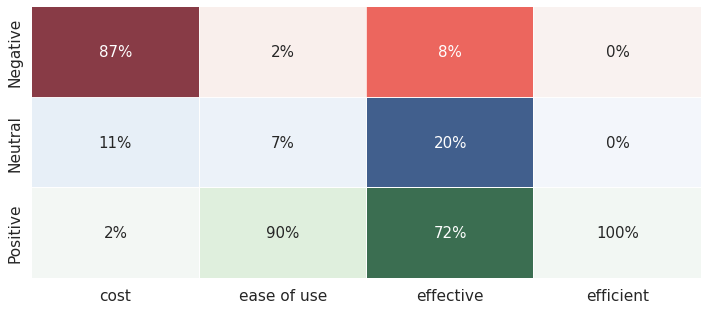

In [51]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)

# Reds
data1 = table_count.copy()
data1.loc['Negative'] = float('nan')
data1.loc['Neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['Negative'] = float('nan')
data2.loc['Positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Greens
data3 = table_count.copy()
data3.loc['Positive'] = float('nan')
data3.loc['Neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Treemap

In [56]:
from collections import defaultdict
import plotly
import plotly.express as px

data = pd.DataFrame.from_dict(df)
fig = px.treemap(df, title='Treemap for Garden Tech', path=['sentiment', 'align_type'])
fig.data[0].textinfo = 'label+text+value'
fig.data[0]['textfont']['color'] = "white"
fig.data[0]['textfont']['size'] = 15
fig.data[0].textposition = 'middle center'

fig.layout.hovermode = False
fig.show()

# Rating - Review Insight

In [61]:
from collections import defaultdict
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)

## Reviews with rating score 1

In [66]:
df_rating1 = df[df['rating'] == 1]

Text(0.5, 1.0, 'Top 10 Products with 1 Ratings')

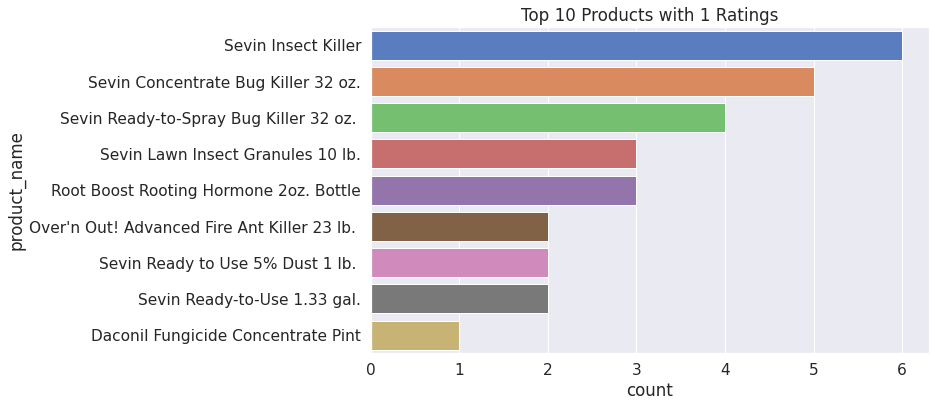

In [67]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 1 Ratings');
sns.countplot(y = 'product_name', data = df_rating1, order = df_rating1['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

In [68]:
## Get the bar chart from 1 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_rating1["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [69]:
# Create Pivot table for the Heatmap
table_count = pd.pivot_table(df_rating1, values='max', index=['sentiment'], columns=['align_type'], aggfunc='count', margins=True, 
                       dropna=True, fill_value=0)

#count the percentage
table2 = table_count.div( table_count.iloc[-1,:], axis=1 ).applymap('{:.0%}'.format)
table2=table2.drop('All').drop(labels='All', axis=1)


#Drop "ALL" column and row
table_count=table_count.drop('All').drop(labels='All', axis=1)

#reshape results
results=np.asarray(table2)

In [ ]:
# Heatmap

plt.figure(figsize=(12, 5))
sns.set(font_scale=1.4)

# Reds
data1 = table_count.copy()
data1.loc['negative'] = float('nan')
data1.loc['neutral'] = float('nan')
ax=sns.heatmap(data1, annot=results, cmap="Greens",alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

# Blue
data2 = table_count.copy()
data2.loc['negative'] = float('nan')
data2.loc['positive'] = float('nan')
ax=sns.heatmap(data2, annot=results, cmap="Blues", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")
# Greens
data3 = table_count.copy()
data3.loc['positive'] = float('nan')
data3.loc['neutral'] = float('nan')
ax=sns.heatmap(data3, annot=results, cmap="Reds", alpha=0.75,fmt="",annot_kws={"fontsize":15},linewidth=0.1,cbar=False)
ax.set(xlabel="", ylabel="")

## Reviews with rating score 5

In [72]:
df_rating5 = df[df['rating'] == 5]

Text(0.5, 1.0, 'Top 10 Products with 5 Ratings')

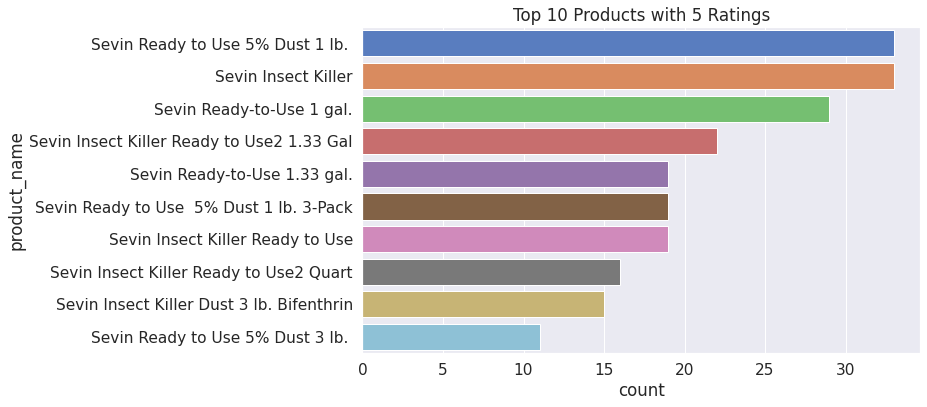

In [73]:
fig,ax = plt.subplots()
fig.set_size_inches(10,6)
plt.title('Top 10 Products with 5 Ratings');
sns.countplot(y = 'product_name', data = df_rating5, order = df_rating5['product_name'].value_counts()[0:10].index, palette = "muted")
#plt.savefig('figs/negative_homedepot', bbox_inches = 'tight');

In [74]:
## Get the bar chart from 5 rated reviews ##
freq_dict = defaultdict(int)
for sent in df_rating5["review_lower"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots');

/usr/local/lib/python3.7/dist-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



# Metric and Sanity Check

AttributeError: ignored

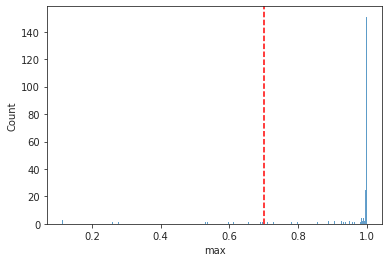

In [ ]:
sns.set_style('ticks');
fig, ax = plt.subplots();
ax = sns.histplot(x = 'max', data = df);
plt.axvline(0.7, 0,700, c = 'r', ls = '--');
for container in ax.containers:
    ax.bar_label(container);

len(df[df['max'] > 0.7])/len(df['max'])
#subcategories of quality. may be too broad


list(df[df['max'] > 0.7]['review_lower'][1:2])

In [ ]:
# to see how many uncategorized data remains
df_uncat = df[df['cost_m'] < 0.7]
df_uncat = df_uncat[df_uncat['efficient_m'] < 0.7]
df_uncat = df_uncat[df_uncat['effective_m'] < 0.7]
df_uncat = df_uncat[df_uncat['ease of use_m'] < 0.7]
df_uncat.info()

In [ ]:
len(df_uncat)

In [ ]:
df_uncat.to_csv('unlabeled_gardentech.csv')

from google.colab import files
files.download("unlabeled_gardentech.csv")

In [ ]:
df.to_csv('evaluation_GardenTech.csv')